In [1]:
library('ggplot2') # 可视化
library('ggthemes') # 可视化
library('scales') # 可视化
library('dplyr') # 数据处理
library('mice') # 缺失值填补
library('randomForest') # 建模 

Warning message:
“package ‘ggplot2’ was built under R version 3.2.5”Warning message:
“package ‘ggthemes’ was built under R version 3.2.5”Warning message:
“package ‘scales’ was built under R version 3.2.5”Warning message:
“package ‘dplyr’ was built under R version 3.2.5”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: Rcpp
mice 2.25 2015-11-09
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



In [2]:
train <- read.csv('../train.csv', stringsAsFactors = F)
test  <- read.csv('../test.csv', stringsAsFactors = F)
#初步观察数据
# 检查数据
str(train)
str(test)
head(train)
head(test)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
'data.frame':	418 obs. of  11 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr  "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myle

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


In [3]:
#可以看到，除了Survived字段不同外，其他字段均相同。合并训练集与测试集，为下一步数据清洗做准备
full  <- bind_rows(train, test) 
str(full)
summary(full)

'data.frame':	1309 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


  PassengerId      Survived          Pclass          Name          
 Min.   :   1   Min.   :0.0000   Min.   :1.000   Length:1309       
 1st Qu.: 328   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median : 655   Median :0.0000   Median :3.000   Mode  :character  
 Mean   : 655   Mean   :0.3838   Mean   :2.295                     
 3rd Qu.: 982   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :1309   Max.   :1.0000   Max.   :3.000                     
                NA's   :418                                        
     Sex                 Age            SibSp            Parch      
 Length:1309        Min.   : 0.17   Min.   :0.0000   Min.   :0.000  
 Class :character   1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.000  
 Mode  :character   Median :28.00   Median :0.0000   Median :0.000  
                    Mean   :29.88   Mean   :0.4989   Mean   :0.385  
                    3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.000  
                    Max.   :80.00   Max.  

In [4]:
# 从乘客名字中提取头衔
full$Title <- gsub('(.*, )|(\\..*)', '', full$Name)

# 查看按照性别划分的头衔数量?
table(full$Sex, full$Title)

        
         Capt Col Don Dona  Dr Jonkheer Lady Major Master Miss Mlle Mme  Mr Mrs
  female    0   0   0    1   1        0    1     0      0  260    2   1   0 197
  male      1   4   1    0   7        1    0     2     61    0    0   0 757   0
        
          Ms Rev Sir the Countess
  female   2   0   0            1
  male     0   8   1            0

In [5]:
# 对于那些出现频率较低的头衔合并为一类  
rare_title <- c('Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer')

# 对于一些称呼进行重新指定（按含义） 如mlle, ms指小姐, mme 指女士
full$Title[full$Title =='Mlle']<- 'Miss' 
full$Title[full$Title =='Ms'] <- 'Miss'
full$Title[full$Title =='Mme']<- 'Mrs' 
full$Title[full$Title %in% rare_title]  <- 'Rare Title'

# 重新查看替换后的情况
table(full$Sex, full$Title)

        
         Master Miss  Mr Mrs Rare Title
  female      0  264   0 198          4
  male       61    0 757   0         25

In [6]:
# 最后从乘客姓名中，提取姓氏
full$Surname <- sapply(full$Name, function(x) strsplit(x, split = '[,.]')[[1]][1])

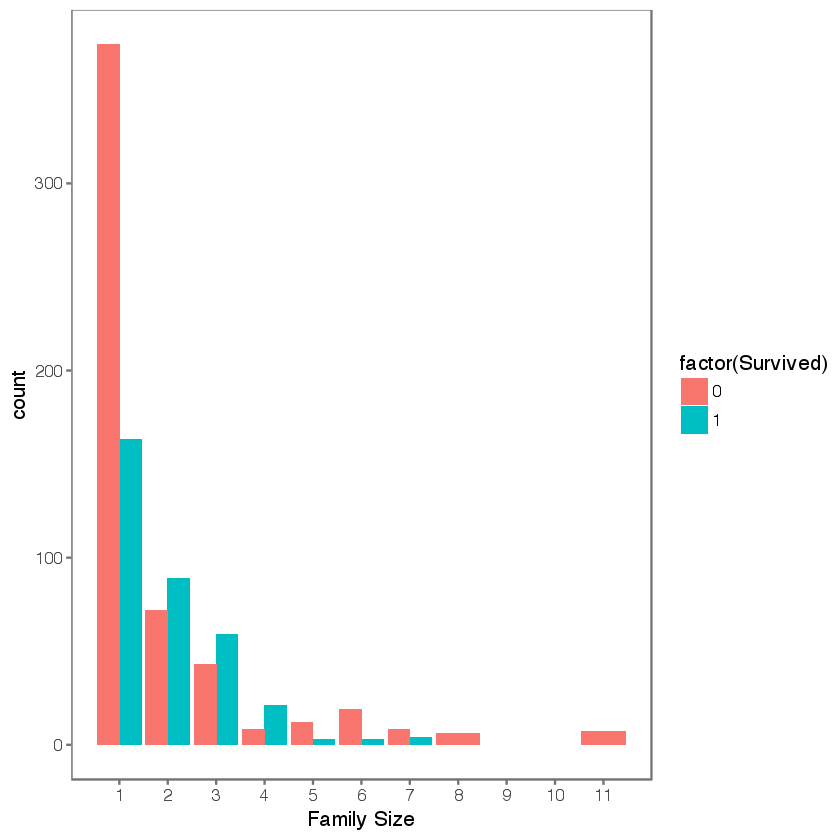

In [7]:
# 生成家庭人数变量，包括自己在内
full$Fsize <- full$SibSp + full$Parch + 1

# 生成一个家庭变量：以姓_家庭人数 格式
full$Family <- paste(full$Surname, full$Fsize, sep='_')

# 使用 ggplot2 绘制家庭人数与生存情况之间的关系
ggplot(full[1:891,], aes(x = Fsize, fill = factor(Survived))) +
  geom_bar(stat='count', position='dodge') +
  scale_x_continuous(breaks=c(1:11)) +
  labs(x = 'Family Size') +
  theme_few()

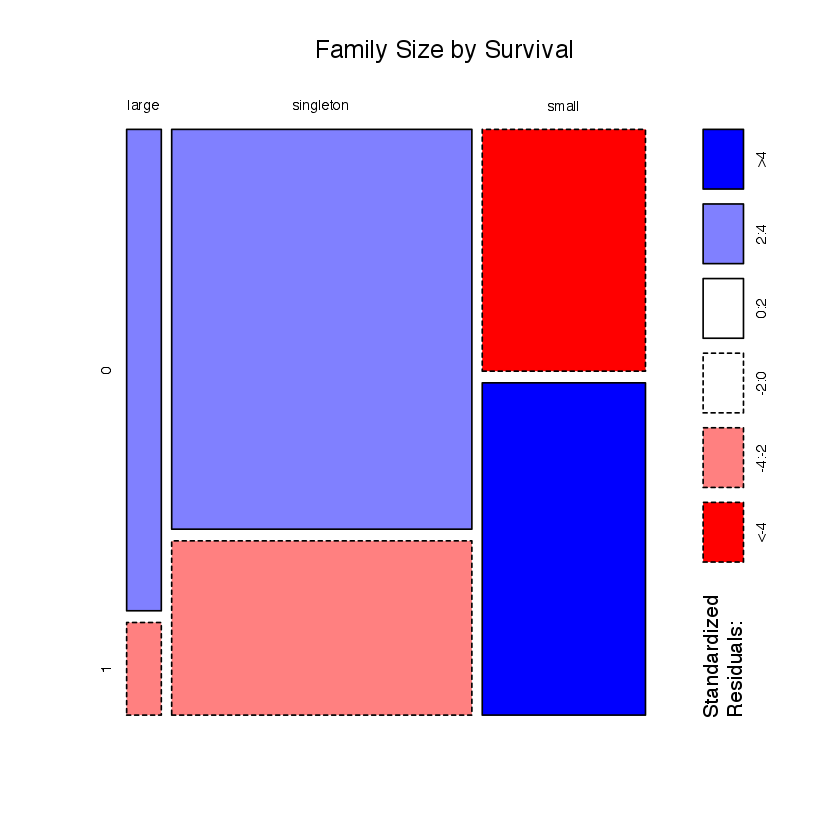

In [8]:
# 离散化
full$FsizeD[full$Fsize == 1] <- 'singleton'
full$FsizeD[full$Fsize < 5 & full$Fsize > 1]<- 'small'
full$FsizeD[full$Fsize > 4] <- 'large'

# 通过马赛克图（mosaic plot）查看家庭规模与生存情况之间关系
mosaicplot(table(full$FsizeD,full$Survived), main='Family Size by Survival', shade=TRUE)

In [9]:
# 可以看出这一变量有很多缺失值
full$Cabin[1:28]

[1] ""            "C85"         ""            "C123"        ""           
 [6] ""            "E46"         ""            ""            ""           
[11] "G6"          "C103"        ""            ""            ""           
[16] ""            ""            ""            ""            ""           
[21] ""            "D56"         ""            "A6"          ""           
[26] ""            ""            "C23 C25 C27"

In [10]:
# 第一个字母即为客舱层数.如:
strsplit(full$Cabin[2], NULL)[[1]]


# 建立一个层数变量（Deck）变化取值从 A - F:
full$Deck<-factor(sapply(full$Cabin, function(x) strsplit(x, NULL)[[1]][1]))
summary(full$Deck)

[1] "C" "8" "5"

A    B    C    D    E    F    G    T NA's 
  22   65   94   46   41   21    5    1 1014

In [11]:
# 乘客 62 and 830 缺少登船港口信息。
full[c(62, 830), 'Embarked']


[1] "" ""

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”

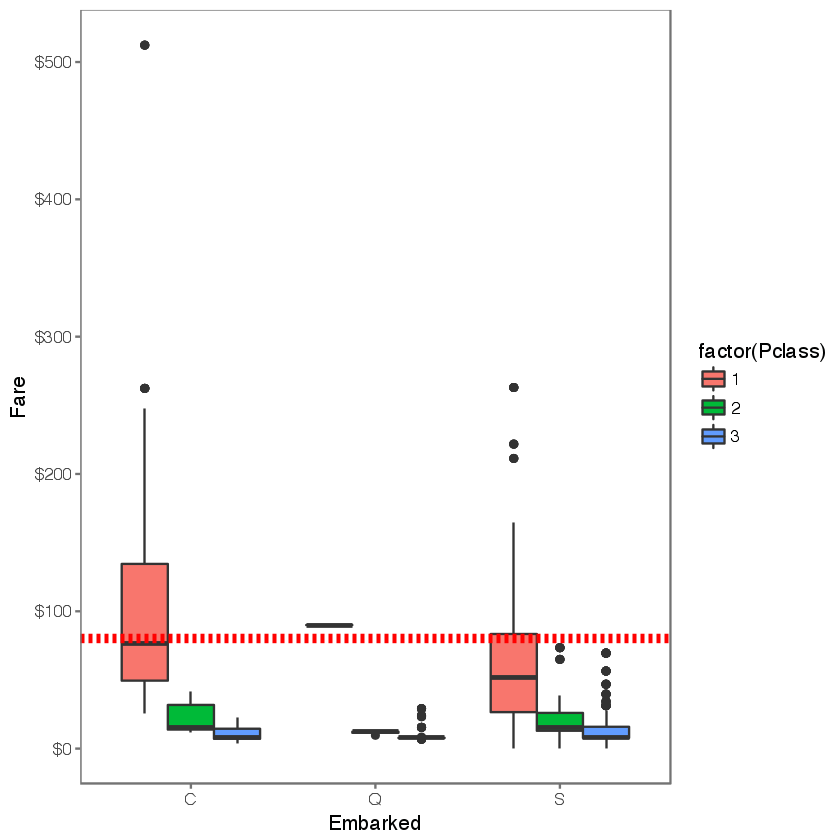

In [12]:
# 去除缺失值乘客的ID
embark_fare <- full %>%   filter(PassengerId != 62 & PassengerId != 830)

# 用 ggplot2 绘制embarkment, passenger class, & median fare 三者关系图
ggplot(embark_fare, aes(x = Embarked, y = Fare, fill = factor(Pclass))) +
  geom_boxplot() +
  geom_hline(aes(yintercept=80), 
  colour='red', linetype='dashed', lwd=2) +
  scale_y_continuous(labels=dollar_format()) +
  theme_few()

In [13]:
# 因为他们票价为80且处于头等舱,因而他们很有可能都是从港口C登船的。
full$Embarked[c(62, 830)] <- 'C'

In [14]:
# 提取1044行数据
full[1044, ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck
1044,1044,NA,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NA,,S,Mr,Storey,1,Storey_1,singleton,NA


Warning message:
“Removed 1 rows containing non-finite values (stat_density).”

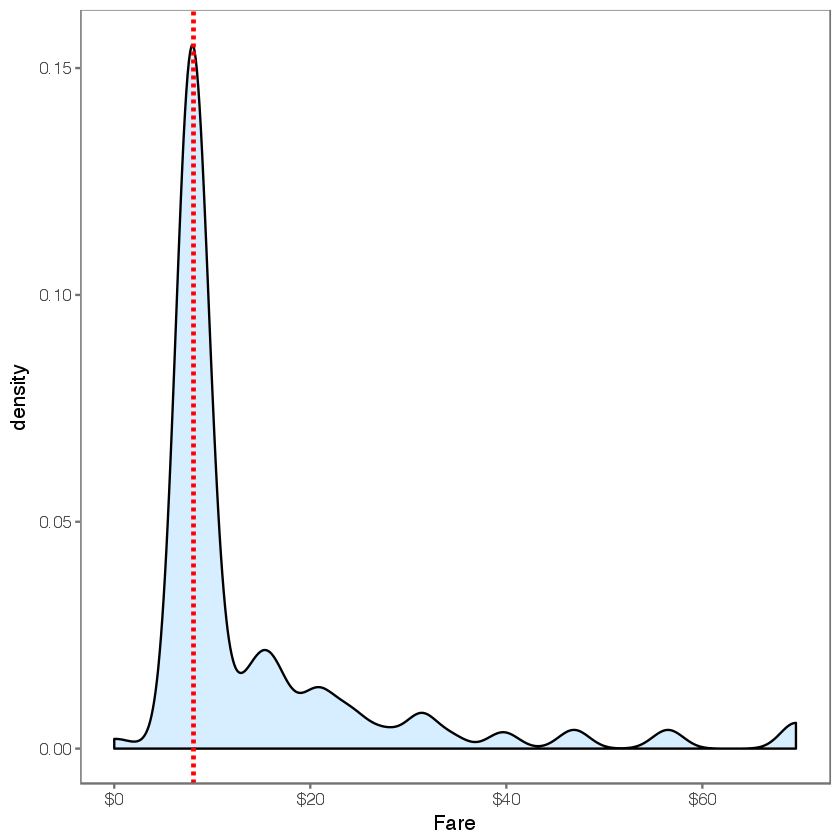

In [15]:
ggplot(full[full$Pclass == '3' & full$Embarked == 'S', ], 
  aes(x = Fare)) +
  geom_density(fill = '#99d6ff', alpha=0.4) +  geom_vline(aes(xintercept=median(Fare, na.rm=T)),colour='red', linetype='dashed', lwd=1) +scale_x_continuous(labels=dollar_format()) + theme_few()

In [16]:
# 基于出发港口和客舱等级，替换票价缺失值
full$Fare[1044] <- median(full[full$Pclass == '3' & full$Embarked == 'S', ]$Fare, na.rm = TRUE)

In [17]:
sum(is.na(full$Age))


[1] 263

In [18]:
# 使因子变量因子化
factor_vars <- c('PassengerId','Pclass','Sex','Embarked',
                 'Title','Surname','Family','FsizeD')

full[factor_vars] <- lapply(full[factor_vars],function(x) as.factor(x))

# 设置随机种子
set.seed(129)

# 执行多重插补法，剔除一些没什么用的变量:
mice_mod <- mice(full[, !names(full) %in% c('PassengerId','Name','Ticket','Cabin','Family','Surname','Survived')], method='rf') 

# 保存完整输出 
mice_output <- complete(mice_mod)


 iter imp variable
  1   1  Age  Deck
  1   2  Age  Deck
  1   3  Age  Deck
  1   4  Age  Deck
  1   5  Age  Deck
  2   1  Age  Deck
  2   2  Age  Deck
  2   3  Age  Deck
  2   4  Age  Deck
  2   5  Age  Deck
  3   1  Age  Deck
  3   2  Age  Deck
  3   3  Age  Deck
  3   4  Age  Deck
  3   5  Age  Deck
  4   1  Age  Deck
  4   2  Age  Deck
  4   3  Age  Deck
  4   4  Age  Deck
  4   5  Age  Deck
  5   1  Age  Deck
  5   2  Age  Deck
  5   3  Age  Deck
  5   4  Age  Deck
  5   5  Age  Deck


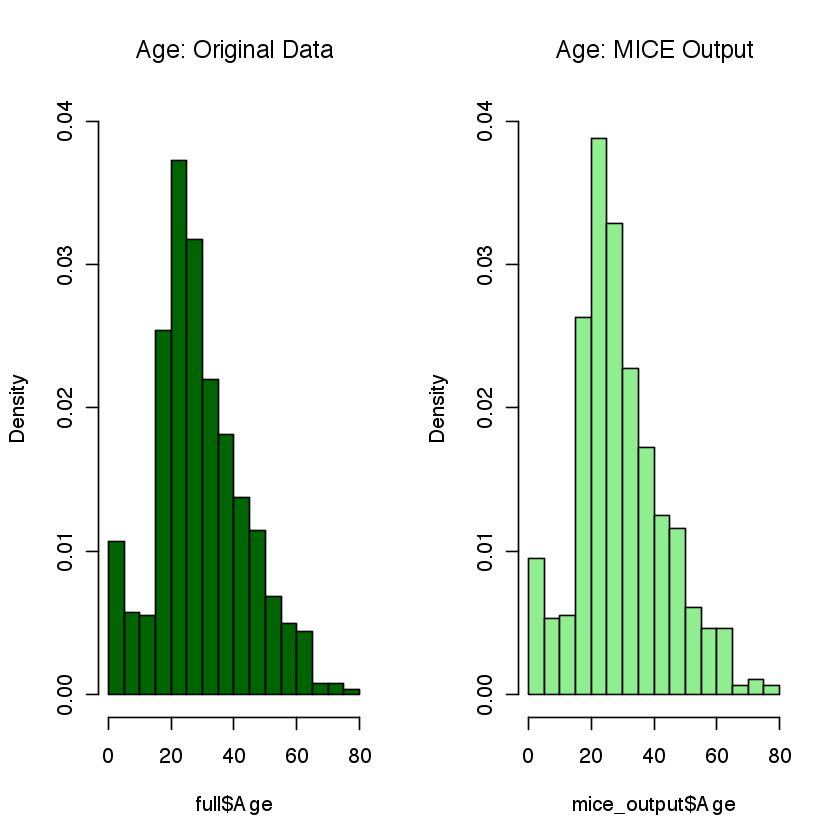

In [19]:
# 绘制年龄分布图
par(mfrow=c(1,2))
hist(full$Age, freq=F, main='Age: Original Data', 
  col='darkgreen', ylim=c(0,0.04))
hist(mice_output$Age, freq=F, main='Age: MICE Output', 
  col='lightgreen', ylim=c(0,0.04))

In [20]:
# MICE模型结果替换年龄变量.
full$Age <- mice_output$Age

# 检查缺失值是否被完全替换了
sum(is.na(full$Age))

[1] 0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


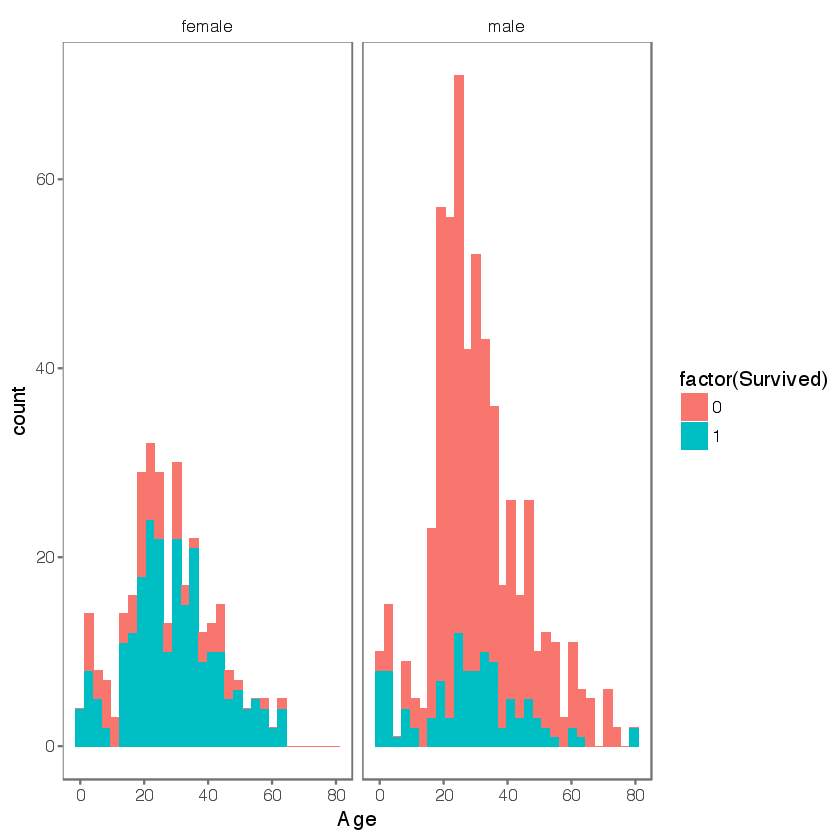

In [21]:
# 首先我们来看年龄与生存情况之间的关系
ggplot(full[1:891,], aes(Age, fill = factor(Survived))) + 
  geom_histogram() + 
  # 分性别来看，因为前面我们知道 性别对于生存情况有重要影响
  facet_grid(.~Sex) + 
  theme_few()

In [22]:
# 生成儿童（child）变量, 并且基于此划分儿童child与成人adult
full$Child[full$Age < 18] <- 'Child'
full$Child[full$Age >= 18] <- 'Adult'

# 展示对应人数
table(full$Child, full$Survived)

       
          0   1
  Adult 484 274
  Child  65  68

In [23]:
# 生成母亲变量
full$Mother <- 'NotMother'

full$Mother[full$Sex =='female' & full$Parch > 0 & full$Age > 18 & full$Title != 'Miss'] <- 'Mother'

# 统计对于数量
table(full$Mother, full$Survived)

##             
##                  0   1
##   Mother        16   39
##   Not Mother    533 303

# 对新生成的两个变量完成因子化。
full$Child  <- factor(full$Child)
full$Mother <- factor(full$Mother)

           
              0   1
  Mother     16  39
  NotMother 533 303

In [24]:
# 将数据拆分为训练集与测试集
train <- full[1:891,]
test <- full[892:1309,]

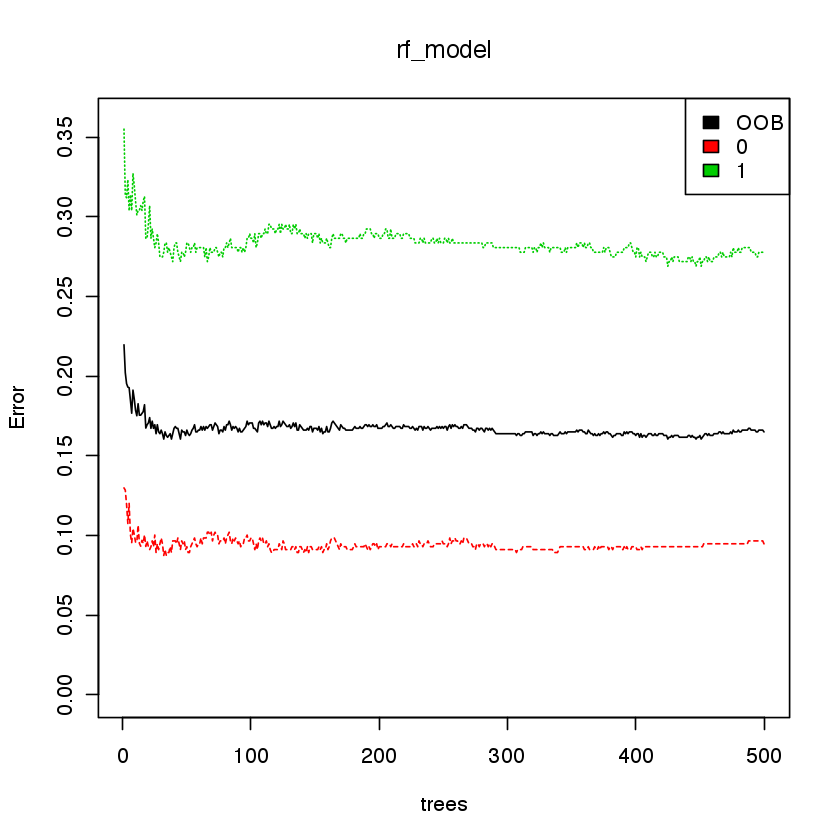

In [25]:
# 设置随机种子
set.seed(754)

# 建立模型l (注意: 不是所有可用变量全部加入)
rf_model <- randomForest(factor(Survived) ~ Pclass + Sex + Age + SibSp + Sex*Parch + Fare + Embarked + Title + FsizeD + Child + Mother, data = train)

# 显示模型误差
plot(rf_model, ylim=c(0,0.36))
legend('topright', colnames(rf_model$err.rate), col=1:3, fill=1:3)

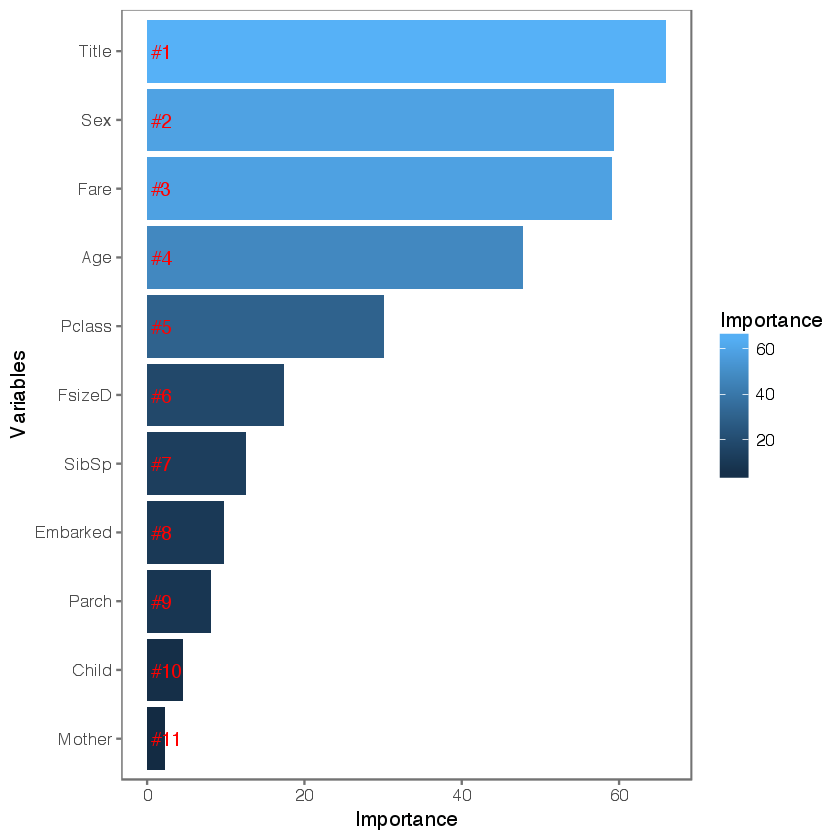

In [26]:
# 获取重要性系数
importance    <- importance(rf_model)
varImportance <- data.frame(Variables = row.names(importance), Importance = round(importance[ ,'MeanDecreaseGini'],2))

# 基于重要性系数排列变量
rankImportance <- varImportance %>%  mutate(Rank = paste0('#',dense_rank(desc(Importance))))

#通过 ggplot2 绘制相关重要性变量图
ggplot(rankImportance, aes(x = reorder(Variables, Importance), 
    y = Importance, fill = Importance)) +
  geom_bar(stat='identity') + 
  geom_text(aes(x = Variables, y = 0.5, label = Rank),
    hjust=0, vjust=0.55, size = 4, colour= 'red') +
  labs(x = 'Variables') +
  coord_flip() + 
  theme_few()


In [27]:
# 基于测试集进行预测
prediction <- predict(rf_model, test)

# 将结果保存为数据框，按照Kaggle提交文档的格式要求。[两列：PassengerId and Survived (prediction)]
solution <- data.frame(PassengerID = test$PassengerId, Survived = prediction)

# 将结果写入文件
write.csv(solution, file = 'rf_mod_Solution1.csv', row.names = F)

In [ ]:
s